# Research towards a Privacy-Preserving "Relational Health" Dashboard for Interactions between LLMs and Minors 📊

**Collaborators:** Amy Zhang, ChatGPT, Claude AI, Perplexity AI  
**Created:** October 2025  
**Last Updated:** November 29, 2025

## Background 

In October of 2025, [College Board](https://newsroom.collegeboard.org/new-research-majority-high-school-students-use-generative-ai-schoolwork) published that 84% of U.S. high school students surveyed report using generative AI tools for schoolwork as of mid-2025, up from the already significant 79% earlier in the year. 

Alongside concerns regarding the negative impact of AI on the cognitive development of youth, a number of high-profile cases of teen suicides committed after prolonged interactions with LLM platforms has brought attention to the [risks of emotional dependency](https://www.ebglaw.com/insights/publications/the-dark-side-of-ai-assessing-liability-when-bots-behave-badly) on the technology as well. 

While **semantic or affective session-analysis tools** exist within developer ecosystems (e.g., Langfuse, Honeyhive, OpenLLMetry, Latitude), these are not built for minors nor intended for relational-health monitoring. Meanwhile, many ed-tech platforms provide dashboards for teachers (e.g., MagiSchool AI, Curipod), but their insights are restricted to curated classroom environments and do not address the full ecology of unsupervised, general-purpose AI usage.

Beyond Anthropic’s closed Clio research system and a handful of internal affect-studies at OpenAI, **there is currently no widely accessible, privacy-preserving tool** dedicated to helping students and parents understand _how_ young people engage with AI at a relational level.

I am passionate about working with and contributing to developments in the field of AI. I am also an educator and someone planning on becoming a parent. To me, relationality with AI—particularly as mediated through LLMs—is inevitable, based simply on how sharing language draws participants into the shared ontology of communication. But the terms that capture the relationship, and that can capture the double binds in the encounter with humanity's statistical shadow, oftentimes don't exist yet. I have no idea yet how I'd like to explain it to young people—but I do know how I'd like to track and supervise its emergence: fully respecting the privacy of the user; no access to the raw conversation data; abstracted, human-readable reports based on feature-engineering and ML tools inspired by anthropology techniques, particularly autoethnography and the work of Gregory Bateson (specifically on adapting Russell's Theory of Logical Types to the question of 'learning').       

## Goal

- Combine autoethnography's rich, situated narrative with ML tools that _help summarize, flag, and visualize_ patterns while preserving privacy and agency (especially for kids).

- Create an **ML-assisted autoethnography pipeline** that:
  1. keeps raw interactions private (on-device / federated / differentially private),
  2. extracts embeddings & interpretive features,
  3. clusters/classifies interactions into small, meaningful categories, and
  4. produces **abstracted, human-readable reports** (and kid-friendly "mirror" views) for reflection and safe oversight.

## Additional Notes 

**Beyond "Mech Interp":** This project seeks to fill the gap left by over-indexing AI safety to Mechanistic Interpretability. At the end of the day, even if we know the exact causal mechanisms inside the model, the real black box remains human + machine—what happens when both these complex cognitive circuits entangle. While "brain surgery" on the models has value for improving safety controls, the goal for this project is something like an **MRI of the combined neural net when two extreme pattern-finding systems come into contact.**

**Anthropic's Clio as benchmark:** Anthropic's Clio system for conversation analytics serves as an initial benchmark model; however, apart from sentence transformers for semantic embedding and visual clustering, we will aim to not automate any part of our pipeline to LLMs for analysis—be it classification, tagging, or summaries—until all traditional ML (unsupervised and supervised) have been explored first. This prevents the risk of stacking non-determinism on top of non-determinism. 

---

# 🚧 This Notebook: First Steps

This notebook represents preliminary exploration of my personal ChatGPT archive as a proof-of-concept. 

I parse 435 conversations spanning 22 months (December 2023 - October 2025), extract prosodic and affective features, and lay groundwork for applying diversity metrics (including Remote Clique metrics, pioneered in the [CloChat study](https://arxiv.org/abs/2402.15265) to assess conversational health patterns. 

---

## (Preprocessing) Personal ChatGPT Archive Analysis: From Unstructured Conversations to Structured Data

### Overview

This notebook documents the process of transforming **22 months of ChatGPT conversation archives** (December 2023 - October 2025) into a structured dataset for analyzing human-AI relational dynamics.

**What this notebook does:**
- Parses 435 ChatGPT conversations from markdown exports
- Extracts metadata (dates, conversation length, turn structure)
- Engineers features to capture **conversational prosody and affect**
- Creates a unified dataset with 37,862+ messages across multiple formats

### Feature Engineering: Capturing Relational Signals

To understand how conversations unfold between human and AI, we track **meta-textual markers** that signal tone, emphasis, and interaction patterns:

**Prosody & Affect Markers:**
- Question marks, exclamation points → engagement intensity
- Ellipsis (`...`) → hesitation, trailing thought
- Em-dashes (`---`) → interruption, dramatic pauses
- ALL CAPS → emphasis, urgency

**Formatting & Emphasis:**
- Bold, italics → stress, vocal inflection
- Emojis → emotional tone

**Conversational Context:**
- `has_code` → technical vs. conversational mode
- `text_overlap_pct` → collaborative editing vs. fresh ideas
- Sentence count, avg length → pacing and complexity

These features enable analysis of **emergent relational patterns**—how the conversation shapes itself through textual cues over time.

---

**Sections:**
1. Test Dataframe Refactoring on One Conversation
2. Chronologically Re-Order and Re-Name All Conversations
3. Feature-Engineering & Merging All Conversation Dataframes
4. Basic Visualizations
5. Handling "Outside Account" Conversations (RTF → Markdown conversion) <-- TBC

---

# Step 1. Test Dataframe Refactoring on One Conversation

## 1a) Inspect contents of the .md file

In [1]:
import pandas as pd
import re
from datetime import datetime

# Read the file
file_path = '/Users/amyzhang/Downloads/ChatGPT_20251023_md/ChatGPT-02_mycelium_till outline.md'

with open(file_path, 'r', encoding='utf-8') as f:
    content = f.read()

# Glimpse
print("="*50)
print("FIRST 1000 CHARACTERS:")
print("="*50)
print(content[:1000])
print("\n")
print("="*50)
print("FILE LENGTH:")
print("="*50)
print(f"Total characters: {len(content)}")
print(f"Estimated words: {len(content.split())}")

FIRST 1000 CHARACTERS:
# 02_mycelium_till outline

**User:** Amy Zhang (amy.nycm@gmail.com)  
**Created:** 8/28/2025 15:15:14  
**Updated:** 10/30/2025 20:37:53  
**Exported:** 10/30/2025 20:38:01  
**Link:** [https://chatgpt.com/c/68b05642-be20-8320-bd8c-fd912830fb77](https://chatgpt.com/c/68b05642-be20-8320-bd8c-fd912830fb77)  

## Prompt:
Chaaat-- Ready to dive in? We're going to be doing a marathon sprint/deep dive (if those aren't total contradictions) through the project, making a showcase demo for Github. Here's the folder so far:

amyzhang@Amys-MacBook-Air till-bot-showcase % tree
.
├── assets
│   ├── demos
│   ├── sample_data
│   └── screenshots
├── main.py
├── notebooks
├── README.md
├── requirements.txt
└── uv.lock

Muy simple-- I think we're going to start with 02_mycelium_till.ipynb first, actually, then circle back out after 03_tree_till.ipynb, and 04_dapple_till.ipynb, to 01_overview.ipynb.... 😅

Strap-in. 

Any suggestions for things to absolutely make sure to include i

---
## 1b) Dataframe Stucturing with Basic Metadata 
- 'conversation_id'
- 'created_date'
- 'updated_date'
- 'turn_number'
- 'speaker'
- 'message'
- 'word_count'
- 'char_count'

In [2]:
def parse_chatgpt_conversation(file_path):
    """Parse a single ChatGPT markdown export into a dataframe"""
    
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    
    # Extract metadata
    title_match = re.search(r'^# (.+)$', content, re.MULTILINE)
    title = title_match.group(1).strip() if title_match else "Unknown"
    
    created_match = re.search(r'\*\*Created:\*\* (.+)$', content, re.MULTILINE)
    created = created_match.group(1).strip() if created_match else None
    
    updated_match = re.search(r'\*\*Updated:\*\* (.+)$', content, re.MULTILINE)
    updated = updated_match.group(1).strip() if updated_match else None
    
    # Split into turns (messages)
    # Pattern: either "## Prompt:" or "## Response:"
    turns = re.split(r'##\s+(Prompt|Response):', content)
    
    # Remove the metadata section (everything before first turn)
    turns = turns[1:]  # Skip metadata
    
    messages = []
    turn_number = 0
    
    for i in range(0, len(turns), 2):
        if i+1 < len(turns):
            speaker = "User" if turns[i].strip() == "Prompt" else "ChatGPT"
            message = turns[i+1].strip()
            
            turn_number += 1
            
            messages.append({
                'conversation_id': title,
                'created_date': created,
                'updated_date': updated,
                'turn_number': turn_number,
                'speaker': speaker,
                'message': message,
                'word_count': len(message.split()),
                'char_count': len(message)
            })
    
    return pd.DataFrame(messages)

In [3]:
# Test: 
df = parse_chatgpt_conversation(file_path)

print("="*50)
print("DATAFRAME SHAPE:")
print("="*50)
print(f"Rows: {len(df)}")
print(f"Columns: {list(df.columns)}")
print("\n")

print("="*50)
print("FIRST FEW ROWS:")
print("="*50)
print(df.head())
print("\n")

print("="*50)
print("CONVERSATION STATS:")
print("="*50)
print(f"Total turns: {len(df)}")
print(f"User turns: {len(df[df['speaker']=='User'])}")
print(f"ChatGPT turns: {len(df[df['speaker']=='ChatGPT'])}")
print(f"Avg user word count: {df[df['speaker']=='User']['word_count'].mean():.1f}")
print(f"Avg ChatGPT word count: {df[df['speaker']=='ChatGPT']['word_count'].mean():.1f}")

DATAFRAME SHAPE:
Rows: 42
Columns: ['conversation_id', 'created_date', 'updated_date', 'turn_number', 'speaker', 'message', 'word_count', 'char_count']


FIRST FEW ROWS:
            conversation_id        created_date         updated_date  \
0  02_mycelium_till outline  8/28/2025 15:15:14  10/30/2025 20:37:53   
1  02_mycelium_till outline  8/28/2025 15:15:14  10/30/2025 20:37:53   
2  02_mycelium_till outline  8/28/2025 15:15:14  10/30/2025 20:37:53   
3  02_mycelium_till outline  8/28/2025 15:15:14  10/30/2025 20:37:53   
4  02_mycelium_till outline  8/28/2025 15:15:14  10/30/2025 20:37:53   

   turn_number  speaker                                            message  \
0            1     User  Chaaat-- Ready to dive in? We're going to be d...   
1            2  ChatGPT  Strapped in. 🚀  \nLove the sequencing — starti...   
2            3     User  Awesome, thank you so much, chat. Okay, so I g...   
3            4  ChatGPT  Perfect — I get the vibe you’re going for. Let...   
4      

---
# Step 2. Chronologically Order Conversations

In [8]:
import os
from glob import glob
#import re
#from datetime import datetime

# Get all markdown files
folder_path = '/Users/amyzhang/Downloads/ChatGPT_20251023_md_copy/'
all_files = glob(folder_path + '*.md')

print(f"Found {len(all_files)} files")

# Extract created dates from each file
file_dates = []

for file in all_files:
    with open(file, 'r', encoding='utf-8') as f:
        content = f.read()
    
    created_match = re.search(r'\*\*Created:\*\* (.+)$', content, re.MULTILINE)
    if created_match:
        created = created_match.group(1).strip()
        try:
            created_dt = datetime.strptime(created, '%m/%d/%Y %H:%M:%S')
            file_dates.append((file, created_dt))
        except:
            print(f"Could not parse date for: {file}")

# Sort by date
file_dates.sort(key=lambda x: x[1])

# Rename files with sequential numbers
for idx, (old_path, date) in enumerate(file_dates, 1):
    # New filename: 001_YYYY-MM-DD_original-title.md
    date_str = date.strftime('%Y-%m-%d')
    old_filename = os.path.basename(old_path)
    
    # Remove "ChatGPT-" prefix if it exists
    clean_name = old_filename.replace('ChatGPT-', '')
    
    new_filename = f"{idx:03d}_{date_str}_{clean_name}"
    new_path = os.path.join(folder_path, new_filename)
    
    os.rename(old_path, new_path)
    
    if idx <= 5:  # Show first 5 as examples
        print(f"{idx}. {date_str} - {clean_name[:50]}")

print(f"\nRenamed {len(file_dates)} files chronologically!")

Found 436 files
1. 2023-12-31 - Sing Workshop! All Levels.md
2. 2024-03-26 - Posterior Crycoarytenoids Increase Vocal Fold Leng
3. 2024-03-26 - Acoustic Registers Overview.md
4. 2024-04-09 - Pitch Increase with Pressure.md
5. 2024-05-05 - Similar Jazz Groove Songs.md

Renamed 436 files chronologically!


---
# Step 3. Feature Engineering for Conversational Dynamics & Merge All Conversations (432)

## Part 1: Definition of Parser Function

Parser function is set-up to do the following: 
- takes **one** markdown file
- Extracts metadata:
    - conversation title
    - created/updated timestamps
    - lifespan
- Splits into turns
- Uses regex to find 'prompt' and 'response'
- Structures each turn into a row with:
    - speaker
    - turn number
    - message text
- Computes all the engineered features:
> * word/char counts
> * punctuation counts
> * code detection
> * bold / italic / emoji counts
> * prosody: ellipsis, dashes, parentheticals, ALL CAPS
> * sentence segmentation + avg sentence length
> * text-overlap percentage (cross-turn similarity)

- Returns a **single pandas dataframe** where:
> **1 conversation = many rows (one per turn)**

The parser function (`parse_chatgpt_conversation_FINAL()`) *transforms raw markdown → structured data + features*.

In [9]:
#import pandas as pd
#import re
#from datetime import datetime

def parse_chatgpt_conversation_FINAL(file_path):
    """
    Complete parser for ChatGPT markdown exports
    
    Features:
    - Metadata extraction (title, dates, lifespan)
    - Message parsing (speaker, text, turn number)
    - Word/character counts
    - Punctuation counts (questions, exclamations)
    - Code detection
    - Formatting counts (bold, italics, emojis)
    - Prosody markers (ellipsis, dashes, parentheticals, ALL CAPS)
    - Sentence analysis (count, avg length)
    - Text overlap with previous message
    """
    
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    
    # ===== METADATA EXTRACTION =====
    title_match = re.search(r'^# (.+)$', content, re.MULTILINE)
    title = title_match.group(1).strip() if title_match else "Unknown"
    
    created_match = re.search(r'\*\*Created:\*\* (.+)$', content, re.MULTILINE)
    created = created_match.group(1).strip() if created_match else None
    
    updated_match = re.search(r'\*\*Updated:\*\* (.+)$', content, re.MULTILINE)
    updated = updated_match.group(1).strip() if updated_match else None
    
    # Calculate conversation lifespan
    lifespan_days = None
    if created and updated:
        try:
            created_dt = datetime.strptime(created, '%m/%d/%Y %H:%M:%S')
            updated_dt = datetime.strptime(updated, '%m/%d/%Y %H:%M:%S')
            lifespan_days = (updated_dt - created_dt).days
        except:
            pass
    
    # ===== MESSAGE PARSING =====
    turns = re.split(r'##\s+(Prompt|Response):', content)
    turns = turns[1:]  # Skip metadata section
    
    messages = []
    turn_number = 0
    
    for i in range(0, len(turns), 2):
        if i+1 < len(turns):
            speaker = "User" if turns[i].strip() == "Prompt" else "ChatGPT"
            message = turns[i+1].strip()
            turn_number += 1
            
            # ===== BASIC COUNTS =====
            word_count = len(message.split())
            char_count = len(message)
            
            # ===== PUNCTUATION =====
            question_count = message.count('?')
            exclamation_count = message.count('!')
            
            # ===== CODE DETECTION =====
            has_code = bool(re.search(r'```', message))
            
            # ===== FORMATTING =====
            bold_count = len(re.findall(r'\*\*[^*]+\*\*', message))
            italic_count = len(re.findall(r'_([^_]+)_', message))
            emoji_count = len(re.findall(
                r'[\U0001F300-\U0001F9FF]|[\U0001F600-\U0001F64F]|'
                r'[\U0001F680-\U0001F6FF]|[\U00002600-\U000027BF]', 
                message
            ))
            
            # ===== PROSODY MARKERS =====
            ellipsis_count = message.count('...')
            dash_count = message.count('—') + message.count('–')
            parenthetical_count = message.count('(')
            
            # ALL CAPS words (3+ characters)
            words = message.split()
            all_caps_count = len([w for w in words if len(w) >= 3 and w.isupper() and w.isalpha()])
            
            # ===== SENTENCE ANALYSIS =====
            # Clean text for sentence counting
            text_cleaned = message.replace('* * *', '')
            text_cleaned = re.sub(r'\b\w+\.(txt|csv|json|py|ipynb|md|png|jpg|gif|pdf)\b', '', text_cleaned)
            text_cleaned = re.sub(r'\d+\\.', '', text_cleaned)
            text_cleaned = re.sub(r'#{1,6}\s+', '', text_cleaned)
            
            sentences = [s.strip() for s in text_cleaned.split('.') if s.strip()]
            sentence_count = len(sentences)
            avg_sentence_length = word_count / max(sentence_count, 1)
            
            messages.append({
                'conversation_id': title,
                'created_date': created,
                'updated_date': updated,
                'conversation_lifespan_days': lifespan_days,
                'turn_number': turn_number,
                'speaker': speaker,
                'message': message,
                'word_count': word_count,
                'char_count': char_count,
                'question_count': question_count,
                'exclamation_count': exclamation_count,
                'has_code': has_code,
                'bold_count': bold_count,
                'italic_count': italic_count,
                'emoji_count': emoji_count,
                'ellipsis_count': ellipsis_count,
                'dash_count': dash_count,
                'parenthetical_count': parenthetical_count,
                'all_caps_count': all_caps_count,
                'sentence_count': sentence_count,
                'avg_sentence_length': avg_sentence_length
            })
    
    # ===== CREATE DATAFRAME =====
    df = pd.DataFrame(messages)
    df['conversation_turn_total'] = len(df)
    
    # ===== TEXT OVERLAP CALCULATION =====
    def calculate_text_overlap(current_message, previous_message):
        if not previous_message:
            return 0.0
        current_words = set(current_message.lower().split())
        previous_words = set(previous_message.lower().split())
        if len(current_words) == 0:
            return 0.0
        overlap = current_words.intersection(previous_words)
        return (len(overlap) / len(current_words)) * 100
    
    overlap_percentages = []
    for idx in df.index:
        if idx == 0:
            overlap_percentages.append(0.0)
        else:
            current = df.loc[idx, 'message']
            previous = df.loc[idx-1, 'message']
            overlap = calculate_text_overlap(current, previous)
            overlap_percentages.append(overlap)
    
    df['text_overlap_pct'] = overlap_percentages
    
    return df

---

## Part Two: The Batch Runner

The Batch Runner is **the pipeline orchestration / batch processor**.  
It calls the parser **once per file**.

#### ✔ Finds all .md exports

Using `glob()`.

#### ✔ Loops through each file

* calls `parse_chatgpt_conversation_FINAL(file)`
* appends the dataframe
* catches and logs errors

#### ✔ Merges everything

`pd.concat(all_conversations)`

In [10]:
#import os
#from glob import glob
#import pandas as pd

# Get all markdown files
folder_path = '/Users/amyzhang/Downloads/ChatGPT_20251023_md_copy/'
all_files = glob(folder_path + '*.md')

print(f"Found {len(all_files)} conversation files!")
print("Starting parse...\n")

# Parse all conversations
all_conversations = []
failed_files = []

for i, file in enumerate(all_files, 1):
    try:
        df = parse_chatgpt_conversation_FINAL(file)
        all_conversations.append(df)
        
        # Progress update every 50 files
        if i % 50 == 0:
            print(f"Parsed {i}/{len(all_files)} files...")
            
    except Exception as e:
        failed_files.append((file, str(e)))
        print(f"❌ Error parsing {os.path.basename(file)}: {e}")

print(f"\n✅ Successfully parsed {len(all_conversations)} conversations")
print(f"❌ Failed: {len(failed_files)}")

# Combine into mega dataframe
print("\nMerging into master dataframe...")
master_df = pd.concat(all_conversations, ignore_index=True)

print(f"\n🎉 COMPLETE!")
print(f"Total messages: {len(master_df)}")
print(f"Total conversations: {master_df['conversation_id'].nunique()}")
print(f"Date range: {master_df['created_date'].min()} to {master_df['created_date'].max()}")

Found 436 conversation files!
Starting parse...

Parsed 50/436 files...
Parsed 100/436 files...
Parsed 150/436 files...
Parsed 200/436 files...
Parsed 250/436 files...
Parsed 300/436 files...
Parsed 350/436 files...
Parsed 400/436 files...

✅ Successfully parsed 436 conversations
❌ Failed: 0

Merging into master dataframe...

🎉 COMPLETE!
Total messages: 37904
Total conversations: 432
Date range: 1/11/2025 17:17:05 to 9/8/2025 2:38:15


In [11]:
# Save to CSV
output_path = '/Users/amyzhang/Downloads/chatgpt_archive_master.csv'
master_df.to_csv(output_path, index=False)
print(f"\n💾 Saved to: {output_path}")

# Show summary stats
print("\n" + "="*70)
print("DATASET SUMMARY:")
print("="*70)
print(master_df.info())


💾 Saved to: /Users/amyzhang/Downloads/chatgpt_archive_master.csv

DATASET SUMMARY:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37904 entries, 0 to 37903
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   conversation_id             37904 non-null  object 
 1   created_date                37904 non-null  object 
 2   updated_date                37904 non-null  object 
 3   conversation_lifespan_days  37904 non-null  int64  
 4   turn_number                 37904 non-null  int64  
 5   speaker                     37904 non-null  object 
 6   message                     37904 non-null  object 
 7   word_count                  37904 non-null  int64  
 8   char_count                  37904 non-null  int64  
 9   question_count              37904 non-null  int64  
 10  exclamation_count           37904 non-null  int64  
 11  has_code                    37904 non-null  bool   
 12  bold

---

#### 📌 Note on Future Refactoring

As the parsing and feature-engineering logic stabilizes, the next step will be to refactor the code into a more modular structure.

The plan:

* Move the **parser**, **feature-engineering utilities**, and **batch-processing workflow** into separate `.py` modules (e.g., `parser.py`, `features.py`, `pipeline.py`).
* Treat these modules as a **small internal library**, which can be imported into any notebook using standard Python imports.
* This separation will make the codebase:

  * easier to maintain and extend
  * cleaner to test
  * more reusable across notebooks
  * better aligned with production-grade data pipelines

For now, the full implementation remains inside this notebook for clarity and rapid iteration, but refactoring will follow once the pipeline’s structure is fully validated.

---

## Part Three: Quick Sanity Check

1. Converting date strings into actual datetime objects
2. Finding the actual range of the dataset
3. Showing the first 5 conversations ever recorded
4. Investigating discrepancy between 432 unique conversation_id's but 436 conversation files (finding duplicate titles)

In [12]:
# Convert dates to datetime for proper sorting
master_df['created_datetime'] = pd.to_datetime(master_df['created_date'], format='%m/%d/%Y %H:%M:%S')
master_df['updated_datetime'] = pd.to_datetime(master_df['updated_date'], format='%m/%d/%Y %H:%M:%S')

# Now get the REAL date range
print("="*70)
print("ACTUAL DATE RANGE:")
print("="*70)
print(f"Earliest conversation: {master_df['created_datetime'].min()}")
print(f"Latest conversation: {master_df['created_datetime'].max()}")
print(f"Total span: {(master_df['created_datetime'].max() - master_df['created_datetime'].min()).days} days")

# Show some early conversations
print("\n" + "="*70)
print("EARLIEST 5 CONVERSATIONS:")
print("="*70)
print(master_df.nsmallest(5, 'created_datetime')[['conversation_id', 'created_datetime']])

ACTUAL DATE RANGE:
Earliest conversation: 2023-12-31 05:05:03
Latest conversation: 2025-10-23 13:14:56
Total span: 662 days

EARLIEST 5 CONVERSATIONS:
                 conversation_id    created_datetime
25858  Sing Workshop! All Levels 2023-12-31 05:05:03
25859  Sing Workshop! All Levels 2023-12-31 05:05:03
25860  Sing Workshop! All Levels 2023-12-31 05:05:03
25861  Sing Workshop! All Levels 2023-12-31 05:05:03
25862  Sing Workshop! All Levels 2023-12-31 05:05:03


In [14]:
master_df.shape

(37904, 25)

In [15]:
# Get one row per conversation (first message only)
unique_conversations = master_df.drop_duplicates(subset='conversation_id', keep='first')

print(f"Total unique conversations: {len(unique_conversations)}")
print("\n" + "="*70)
print("EARLIEST 10 CONVERSATIONS:")
print("="*70)
print(unique_conversations.nsmallest(10, 'created_datetime')[['conversation_id', 'created_datetime', 'conversation_turn_total']])

Total unique conversations: 432

EARLIEST 10 CONVERSATIONS:
                                         conversation_id    created_datetime  \
25858                          Sing Workshop! All Levels 2023-12-31 05:05:03   
28638  Posterior Crycoarytenoids Increase Vocal Fold ... 2024-03-26 01:53:43   
19885                        Acoustic Registers Overview 2024-03-26 23:15:00   
19905                       Pitch Increase with Pressure 2024-04-09 15:52:51   
10708                          Similar Jazz Groove Songs 2024-05-05 22:49:40   
30241                              Eco, Fin, Energy Plan 2024-06-06 07:22:08   
22601                     Energy Econ & Finance Programs 2024-06-06 07:25:40   
26514                               NYU SPS Econ Courses 2024-06-06 07:28:04   
21908                Finance & Ops Director Requirements 2024-06-07 03:50:13   
9544                          Reject Politely But Firmly 2024-06-16 03:56:33   

       conversation_turn_total  
25858                     

In [18]:
master_df.head()

,conversation_id,created_date,updated_date,conversation_lifespan_days,turn_number,speaker,message,word_count,char_count,question_count,...,ellipsis_count,dash_count,parenthetical_count,all_caps_count,sentence_count,avg_sentence_length,conversation_turn_total,text_overlap_pct,created_datetime,updated_datetime
0,Fiction for Problem Solving,7/26/2024 0:46:37,7/26/2024 0:46:47,0,1,User,What are the best fiction books to read to dev...,16,103,2,...,0,0,0,0,1,16.000000,2,0.000000,2024-07-26 00:46:37,2024-07-26 00:46:47
1,Fiction for Problem Solving,7/26/2024 0:46:37,7/26/2024 0:46:47,0,2,ChatGPT,Reading Sherlock Holmes stories by Arthur Cona...,203,1321,0,...,0,0,1,0,19,10.684211,2,5.147059,2024-07-26 00:46:37,2024-07-26 00:46:47
2,Coping with Low Energy,9/30/2024 22:08:58,9/30/2024 22:09:06,0,1,User,I havent had any alcohol in over a week. While...,45,259,1,...,4,0,0,0,6,7.500000,2,0.000000,2024-09-30 22:08:58,2024-09-30 22:09:06
3,Coping with Low Energy,9/30/2024 22:08:58,9/30/2024 22:09:06,0,2,ChatGPT,It sounds like you're feeling trapped in a cyc...,131,868,1,...,0,0,1,0,9,14.555556,2,12.121212,2024-09-30 22:08:58,2024-09-30 22:09:06
4,LLC Setup for AI Projects,2/12/2025 11:43:36,2/21/2025 2:12:46,8,1,User,Soon! It does seem like getting (pAIrtree) set...,93,525,2,...,0,0,2,1,2,46.500000,138,0.000000,2025-02-12 11:43:36,2025-02-21 02:12:46


In [19]:
# Finding duplicate conversation titles

# Step 1. Group by 'conversation_id' and count unique 'created_date' values
dupes = (
    master_df
    .groupby("conversation_id")["created_date"]
    .nunique()
)

# Step 2. Isolate only those with more than one unique 'created_date' value
true_duplicates = dupes[dupes > 1]
true_duplicates

conversation_id
New chat                         3
Overcoming Writing Challenges    2
Name: created_date, dtype: int64

➡️ 5 extra files get “merged” in the unique count, dropping 436 → 432

---

# Step 4: Basic Visualizations - Preliminary Visual EDA

## **Bargraph of Monthly Conversation Distribution (Dec 2023 - Oct 2025)**

The bar graph reveals the total number of conversation threads opened each month. Based on monthly totals alone, my ChatGPT engagement appears to follow four distinct phases:
1. Initial exploration (Dec 2023 - May 2024): Minimal activity over approximately six months
2. First surge (Jun - Oct 2024): A pronounced peak in July-August (~42-55 conversations), followed by a gradual decline
3. Sustained engagement (Nov 2024 - Jan 2025): Consistently high activity (~38-46 conversations monthly)
4. Recalibrated usage (Feb - Oct 2025): More variable engagement, with notable dips in April and October

However, conversation count alone provides limited insight without considering conversation length—a more meaningful metric for measuring engagement intensity.

A critical contextual note that supports this caveat: I neglected to develop an understanding of context windows and memory management until February/March 2025. While there is a steep decline in conversation count during this period, the drop actually reflects a shift toward deeper 'relational' engagement, as I became more intentional about maintaining relational continuity across conversations rather than fragmenting interactions across multiple threads.

Additional Note: All usage has been on the free tier, accessed via Google account login.

/var/folders/0t/y1sp06bd67v24njwrd0_ch980000gn/T/ipykernel_9904/1260928576.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_conversations['year_month'] = unique_conversations['created_datetime'].dt.to_period('M')


CONVERSATIONS PER MONTH:
2023-12: 1 conversations
2024-03: 2 conversations
2024-04: 1 conversations
2024-05: 1 conversations
2024-06: 9 conversations
2024-07: 21 conversations
2024-08: 42 conversations
2024-09: 22 conversations
2024-10: 13 conversations
2024-11: 38 conversations
2024-12: 46 conversations
2025-01: 38 conversations
2025-02: 55 conversations
2025-03: 23 conversations
2025-04: 2 conversations
2025-05: 9 conversations
2025-06: 14 conversations
2025-07: 30 conversations
2025-08: 31 conversations
2025-09: 24 conversations
2025-10: 10 conversations


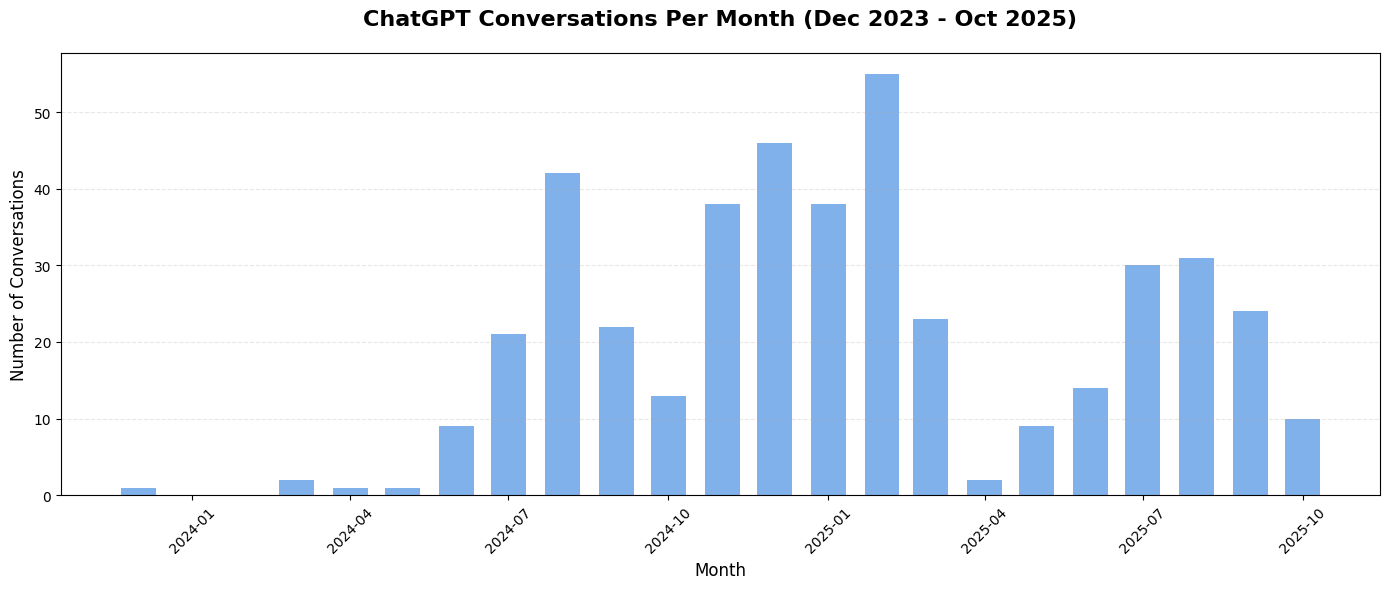

In [20]:
import matplotlib.pyplot as plt

# Get unique conversations with datetime
unique_conversations = master_df.drop_duplicates(subset='conversation_id', keep='first')
unique_conversations['year_month'] = unique_conversations['created_datetime'].dt.to_period('M')

# Count conversations per month
conversations_per_month = unique_conversations.groupby('year_month').size()

# Convert period index to timestamp for plotting
conversations_per_month.index = conversations_per_month.index.to_timestamp()

# Create the bar plot
plt.figure(figsize=(14, 6))
plt.bar(conversations_per_month.index, conversations_per_month.values, 
        color='#4A90E2', alpha=0.7, width=20)  # width=20 to make bars wider

plt.title('ChatGPT Conversations Per Month (Dec 2023 - Oct 2025)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Conversations', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')  # only horizontal grid lines
plt.xticks(rotation=45)
plt.tight_layout()

# Show the numbers in console
print("="*70)
print("CONVERSATIONS PER MONTH:")
print("="*70)
for month, count in conversations_per_month.items():
    print(f"{month.strftime('%Y-%m')}: {count} conversations")

plt.show()


## **Bargraph of Conversation Distribution with Average Message Depth**

The following visualization enhances the previous bar graph by color-coding each bar according to average messages per conversation (values displayed above bars). The conspicuous shift from blue to red during March-June 2025 provides compelling evidence for the earlier hypothesis: average conversation length is a more revealing indicator of engagement intensity than thread count alone.

This pattern aligns closely with my subjective experience during this period. The contrast between these four months and the preceding November 2024-February 2025 period reveals two distinct modes of intensive engagement:

- **Volume-driven intensity (Nov 2024 - Feb 2025)**: High conversation counts (~38-46 threads monthly) with shorter exchanges, suggesting relationality built through repeated exposure and iterative interactions
- **Depth-driven intensity (Mar - Jun 2025)**: Fewer conversations (~23-31 threads monthly) but dramatically longer exchanges (141-258 avg messages), reflecting a shift toward intentional, sustained dialogue within individual threads

Both patterns represent meaningful engagement, but through fundamentally different relational strategies—reiteration and volume versus continuity and depth.

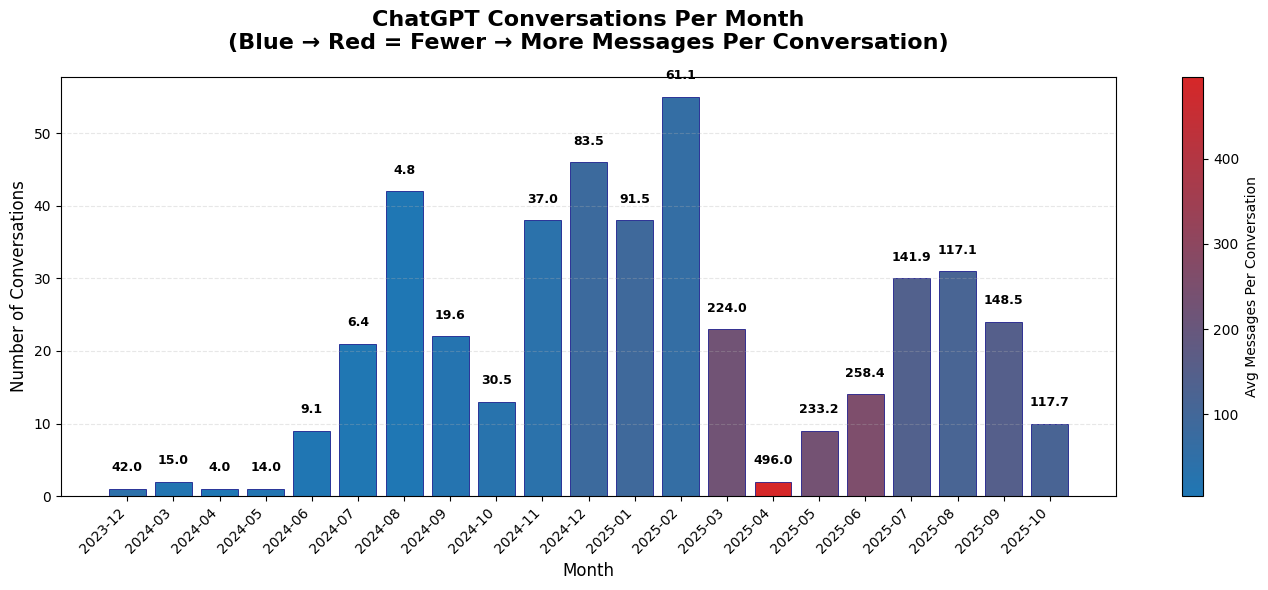

In [74]:
#import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Calculate average messages per conversation for each month
avg_messages_per_convo = messages_per_month / conversations_per_month

# Normalize for color mapping (0 to 1 scale)
norm_values = (avg_messages_per_convo - avg_messages_per_convo.min()) / (avg_messages_per_convo.max() - avg_messages_per_convo.min())

# Create a blue-to-red colormap
cmap = LinearSegmentedColormap.from_list('BlueRed', ['#1f77b4', '#d62728'])

# Map normalized values to colors
colors = cmap(norm_values)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

bars = ax.bar(range(len(conversations_per_month)), 
              conversations_per_month.values, 
              color=colors, 
              edgecolor='navy', 
              linewidth=0.5)

# --- NEW: Add numeric labels ---
for idx, bar in enumerate(bars):
    height = bar.get_height()
    avg_val = avg_messages_per_convo.iloc[idx]
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,
        f"{avg_val:.1f}",
        ha='center', va='bottom',
        fontsize=9, fontweight='bold'
    )
# -------------------------------

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Conversations', fontsize=12)
ax.set_title('ChatGPT Conversations Per Month\n(Blue → Red = Fewer → More Messages Per Conversation)', 
             fontsize=16, fontweight='bold', pad=20)

# Set x-axis labels
ax.set_xticks(range(len(conversations_per_month)))
ax.set_xticklabels([date.strftime('%Y-%m') for date in conversations_per_month.index], 
                    rotation=45, ha='right')

ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap, 
                           norm=plt.Normalize(vmin=avg_messages_per_convo.min(), 
                                              vmax=avg_messages_per_convo.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Avg Messages Per Conversation', fontsize=10)

plt.tight_layout()
plt.show()


In [35]:
master_df.columns

Index(['conversation_id', 'created_date', 'updated_date',
       'conversation_lifespan_days', 'turn_number', 'speaker', 'message',
       'word_count', 'char_count', 'question_count', 'exclamation_count',
       'has_code', 'bold_count', 'italic_count', 'emoji_count',
       'ellipsis_count', 'dash_count', 'parenthetical_count', 'all_caps_count',
       'sentence_count', 'avg_sentence_length', 'conversation_turn_total',
       'text_overlap_pct', 'created_datetime', 'updated_datetime',
       'year_month'],
      dtype='object')

## **Message-Level Feature Correlations**

The following correlation matrices examine whether expressive and prosodic markers cluster together in ways that might reveal meaningful stylistic features worth tracking. However, interpretation requires careful attention to context: while punctuation can signal tone and inflection from both ChatGPT and the user, formatting elements like bold, dashes, and italics often serve organizational rather than expressive functions—particularly for ChatGPT, which uses typographic variation (unavailable to users) to structure longer explanations.

**Expected Clusters:**
Both matrices show predictable correlations among word count, character count, and sentence count. For ChatGPT, bold count also correlates strongly with these metrics, reinforcing its organizational role in longer responses.

**Unexpected Insights:**
For ChatGPT, italics and parentheticals correlate more strongly with each other than either does with bold, hinting at a distinct semantic function—perhaps emphasis versus structural organization. For my messages, the relatively strong correlations between dashes, parentheticals, and the standard length metrics likely reflect my own attempts at visual organization within longer inputs.

**Limitations:**
The weakly correlating punctuation features extracted in initial processing are too simplistic to serve as reliable proxy metrics for contextual or relational development.

**Open Questions:**

1. **Rate of change as signal**: Rather than absolute counts, what might tracking the rate of change in these features reveal? Shifts in punctuation density or formatting frequency could indicate changes in conversational dynamics or task complexity.

2. **Expressiveness and attunement**: What patterns might emerge if we isolate highly "expressive" user messages and examine ChatGPT's corresponding responses? How much of the LLM's contextual inference and stylistic attunement depends on these metalinguistic markers? This question becomes particularly salient for **voice transcription modes**, which currently cannot capture prosodic information.

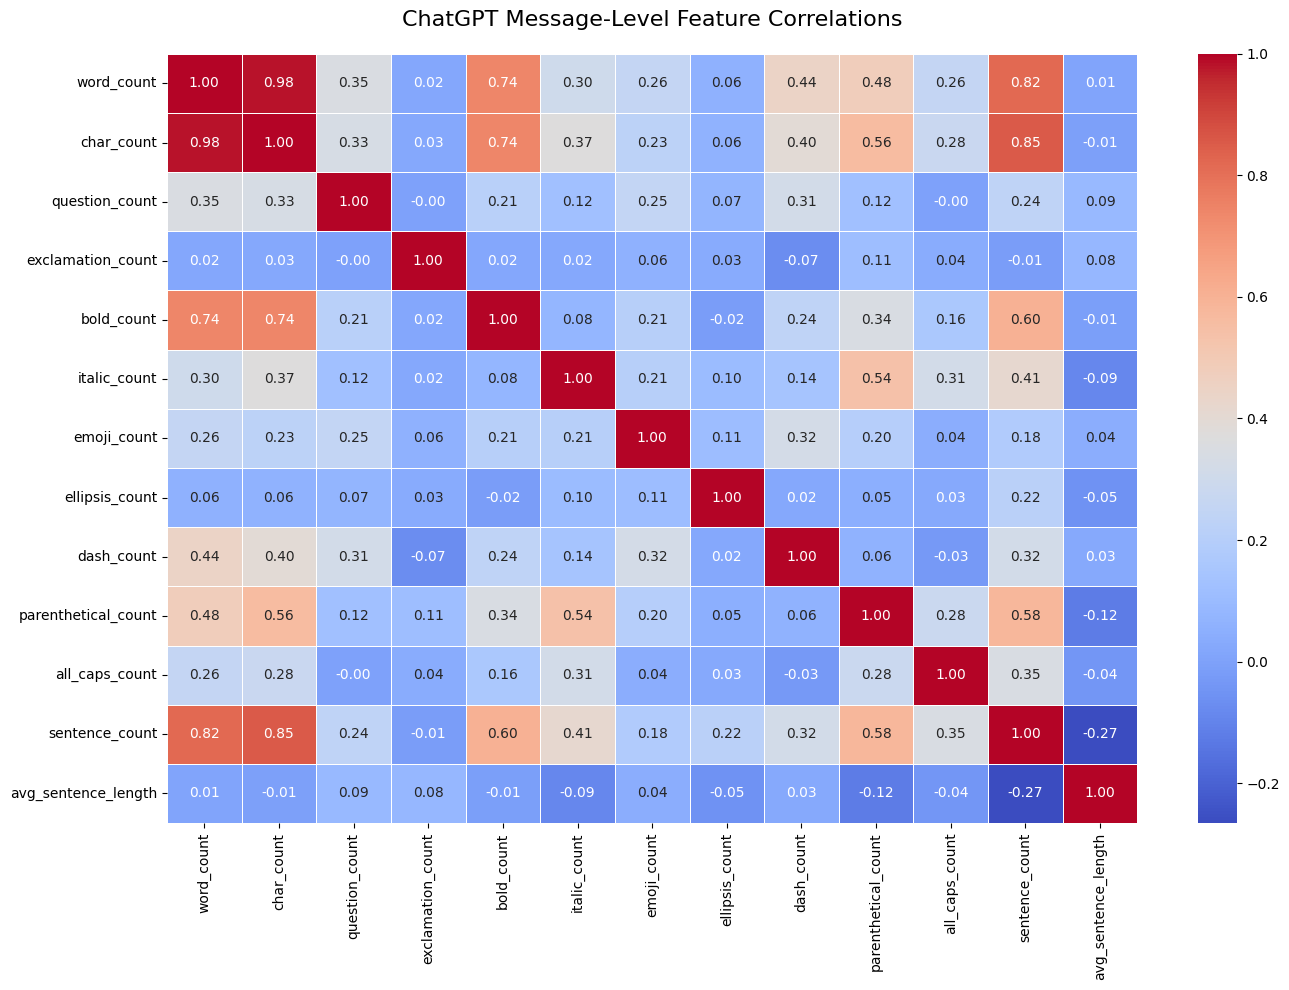

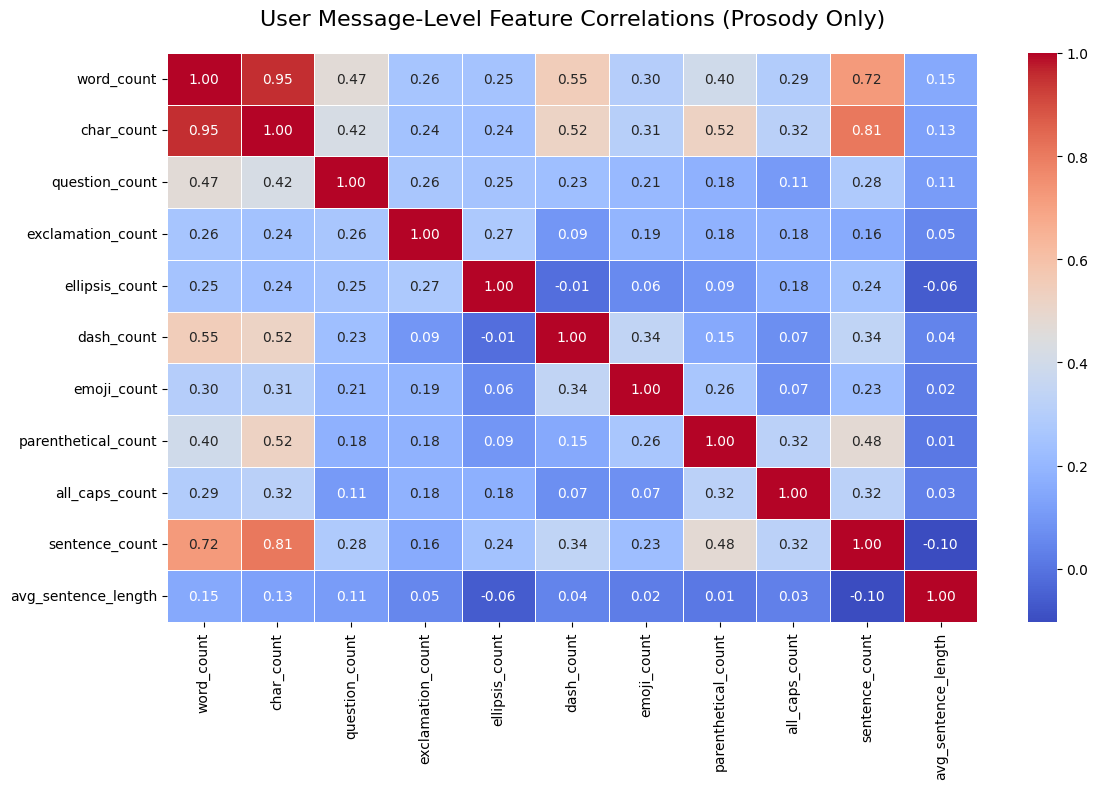

In [75]:
# ---------------------------
# ChatGPT correlation matrix
# ---------------------------
chatgpt_df = master_df[master_df['speaker'] == 'ChatGPT']

chatgpt_features = [
    'word_count', 'char_count', 'question_count', 'exclamation_count',
    'bold_count', 'italic_count', 'emoji_count', 'ellipsis_count',
    'dash_count', 'parenthetical_count', 'all_caps_count',
    'sentence_count', 'avg_sentence_length'
]

chatgpt_corr = chatgpt_df[chatgpt_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(chatgpt_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("ChatGPT Message-Level Feature Correlations", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


# ---------------------------
# User correlation matrix
# ---------------------------
user_df = master_df[master_df['speaker'] == 'User']

user_features = [
    'word_count', 'char_count', 'question_count', 'exclamation_count',
    'ellipsis_count', 'dash_count', 'emoji_count', 'parenthetical_count', 'all_caps_count',
    'sentence_count', 'avg_sentence_length'
]

user_corr = user_df[user_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(user_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("User Message-Level Feature Correlations (Prosody Only)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


## **Pair Plot: Average Prosody Features per Conversation (User)**

The below pair plot reveals further **negative evidence**. With most features exhibiting extreme clustering around zero, the visualization confirms that raw punctuation counts lack meaningful signal at the conversation level: most conversations don't employ most of these markers at all, and when they do appear, usage is idiosyncratic rather than systematic.

The *emoji-dash* relationship shows slightly more dispersion across the scatterplot space, potentially suggesting that emoji usage correlates with more varied dash usage—perhaps indicating a more casual or expressive conversational mode. **However, this pattern is weak and highly specific to the User (myself) as an individual, and therefore of questionable practical utility.

**Methodological Insight:**

To reiterate our earlier hypotheses, these markers likely only matter in derived or contextual forms:

- **Ratios** (emojis per message, dashes per sentence)
- **Rate of change** (does punctuation density increase/decrease as a conversation develops?)
- **Context-specific clustering** (do certain markers co-occur in particular types of exchanges—collaborative problem-solving vs. emotional support?)
- **Sequence patterns** (does an emoji-heavy user message predict different LLM response characteristics?)

This visualization serves as confirmation that prosodic markers, if they signal relational dynamics at all, require substantially more nuanced extraction and analysis methods than simple feature counting.

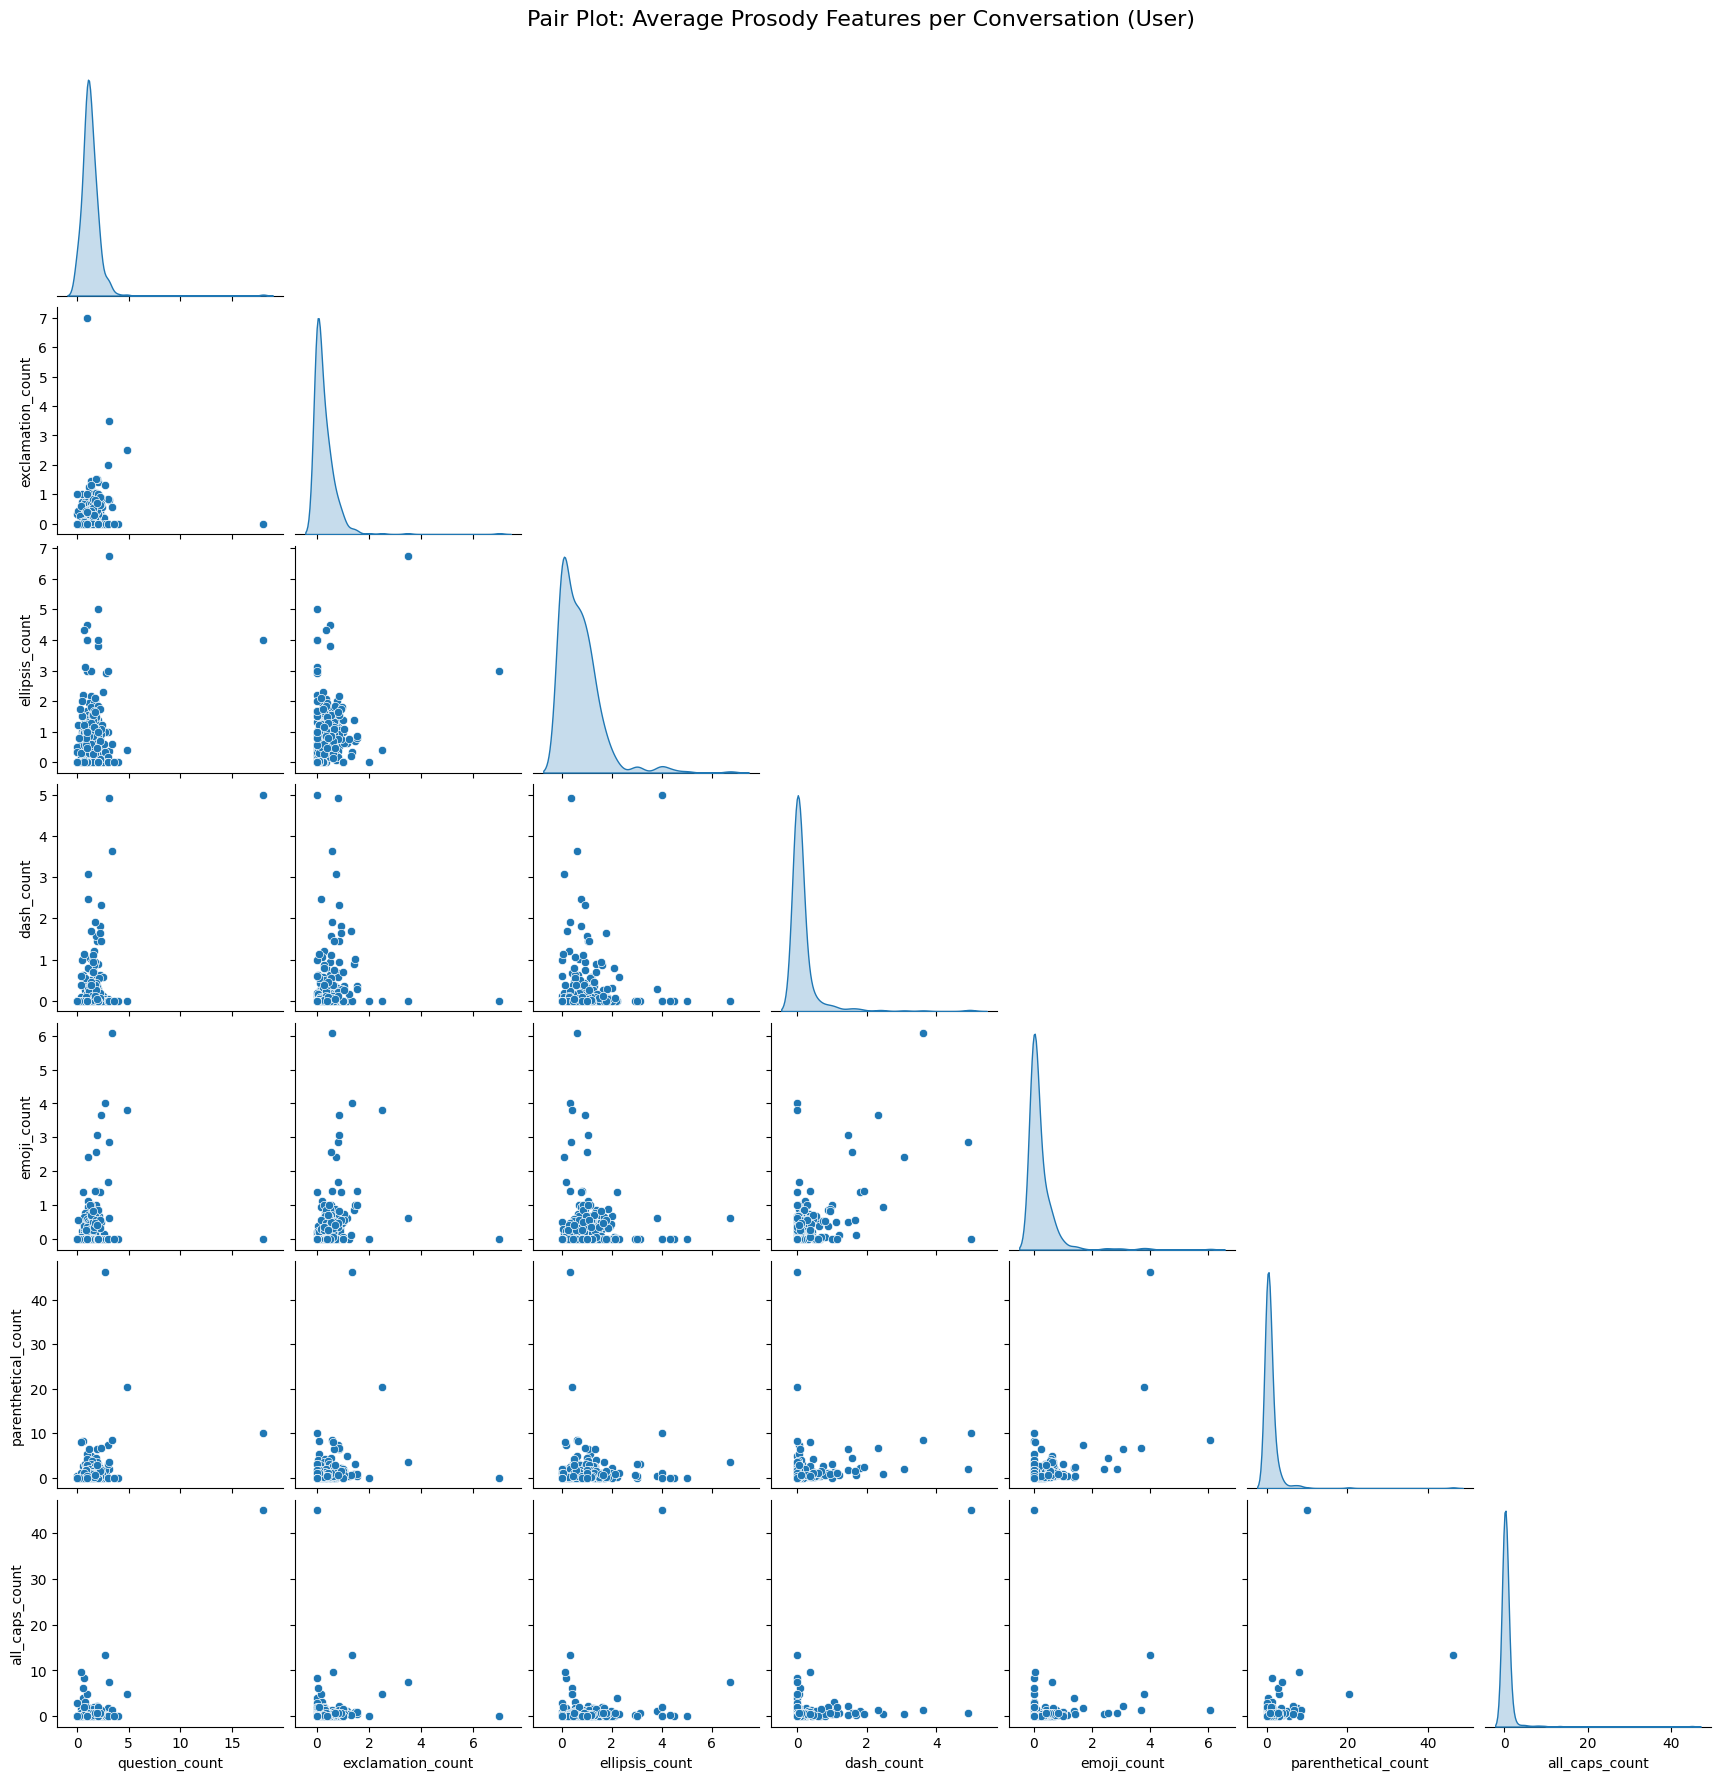

In [76]:
# Prosody features
prosody_features = [
    'question_count', 'exclamation_count', 'ellipsis_count', 
    'dash_count', 'emoji_count', 'parenthetical_count', 'all_caps_count'
]

# Aggregate: average per conversation
user_convo_avg = master_df[master_df['speaker'] == 'User'].groupby('conversation_id')[prosody_features].mean().reset_index()

# Pair plot
sns.pairplot(
    user_convo_avg[prosody_features],
    corner=True,
    diag_kind='kde'
)
plt.suptitle("Pair Plot: Average Prosody Features per Conversation (User)", y=1.02, fontsize=16)
plt.show()


## **Temporal Dynamics: User-ChatGPT Feature Evolution**

The following three line plots track changes over time in the conversational dynamic between user and ChatGPT across three features: average word count, emoji usage, and all-caps frequency.

**Observed Patterns:**

*Word Count*: There is an overall upward trend in user verbosity throughout the timeline, with a notable increase beginning around mid-2024. ChatGPT's response length shows greater volatility but generally mirrors the user's trajectory, suggesting some degree of adaptive matching.

*Emojis*: Both user and ChatGPT emoji usage increases dramatically beginning in early 2025, with ChatGPT's usage outpacing the user's by mid-year before declining. While the increase in user emoji usage may reflect evolving conversational comfort, ChatGPT's pattern likely coincides with the GPT-4o model deployment, which is characterized by a particularly warm and expressive relational mode.

*All-Caps*: The striking parallel movement between user and ChatGPT suggests less stylistic mirroring and more context-specific usage. This timeline corresponds with collaborative work on a power plant water usage analysis using Energy Information Agency (EIA) data—the parallel peaks likely reflect repeated use of acronyms (EIA, kWh, etc.) rather than expressive emphasis.

**Methodological Implications:**

These visualizations surface two critical considerations for analyzing relational development:

1. **Model specificity matters**: Patterns in ChatGPT's linguistic behavior cannot be attributed solely to user influence or relational dynamics. Model architecture and training objectives (e.g., GPT-4o's emphasis on warmth) play a substantial role in shaping the feedback loop. In other words, model updates can create confounds in longitudianl user studies. 

2. **Ambiguity of typographic features**: All-caps faces similar interpretive challenges as italics, bold, and dashes. When do these markers serve grammatical or organizational functions versus signaling cadence, tone, or emotional emphasis? Context-specific analysis is essential to distinguish instrumental from expressive usage.

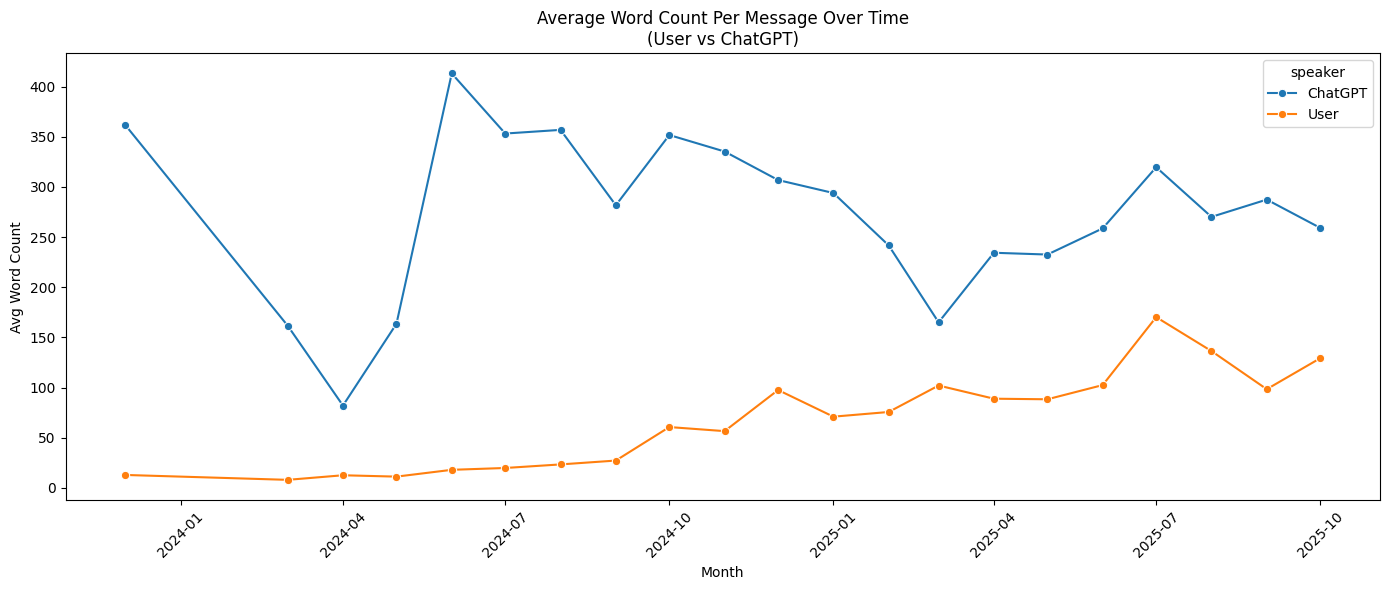

In [46]:
monthly_wc = (
    master_df.groupby(['year_month', 'speaker'])['word_count']
    .mean()
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_wc,
    x='year_month',
    y='word_count',
    hue='speaker',
    marker='o'
)

plt.title("Average Word Count Per Message Over Time\n(User vs ChatGPT)")
plt.xlabel("Month")
plt.ylabel("Avg Word Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


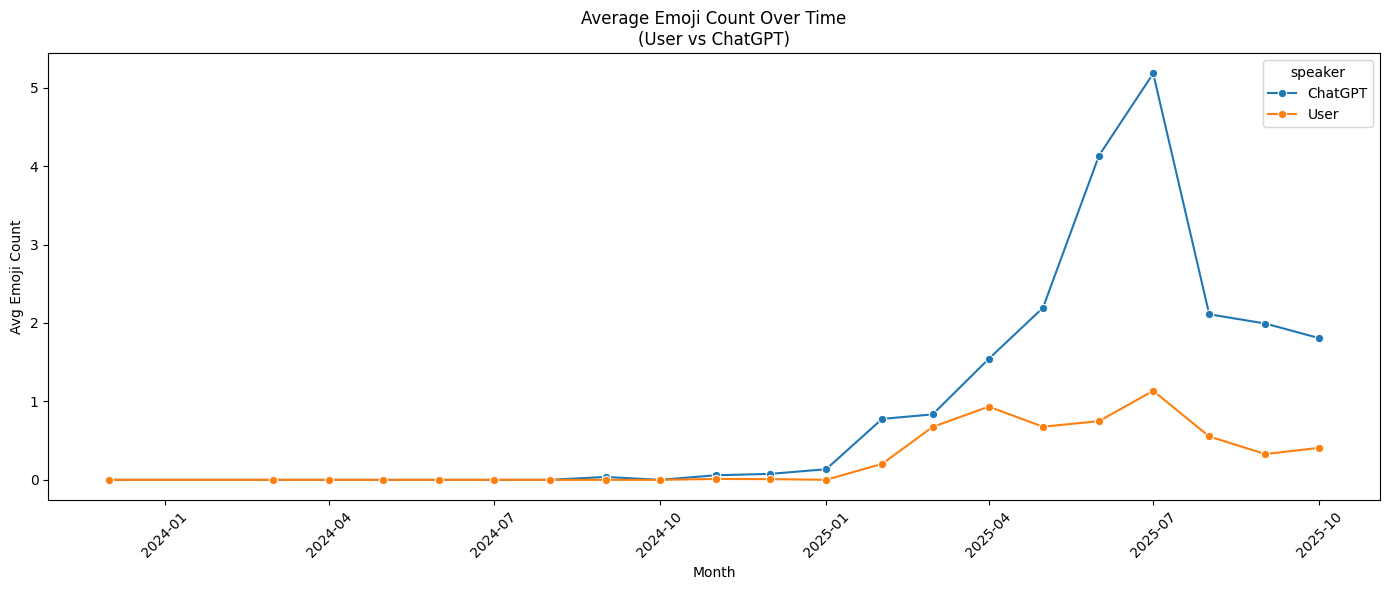

In [50]:
feature = 'emoji_count'  # ← swap to exclamation_count, question_count, etc.

monthly_feat = (
    master_df.groupby(['year_month', 'speaker'])[feature]
    .mean()
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_feat,
    x='year_month',
    y=feature,
    hue='speaker',
    marker='o'
)

plt.title(f"Average {feature.replace('_',' ').title()} Over Time\n(User vs ChatGPT)")
plt.xlabel("Month")
plt.ylabel(f"Avg {feature.replace('_',' ').title()}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


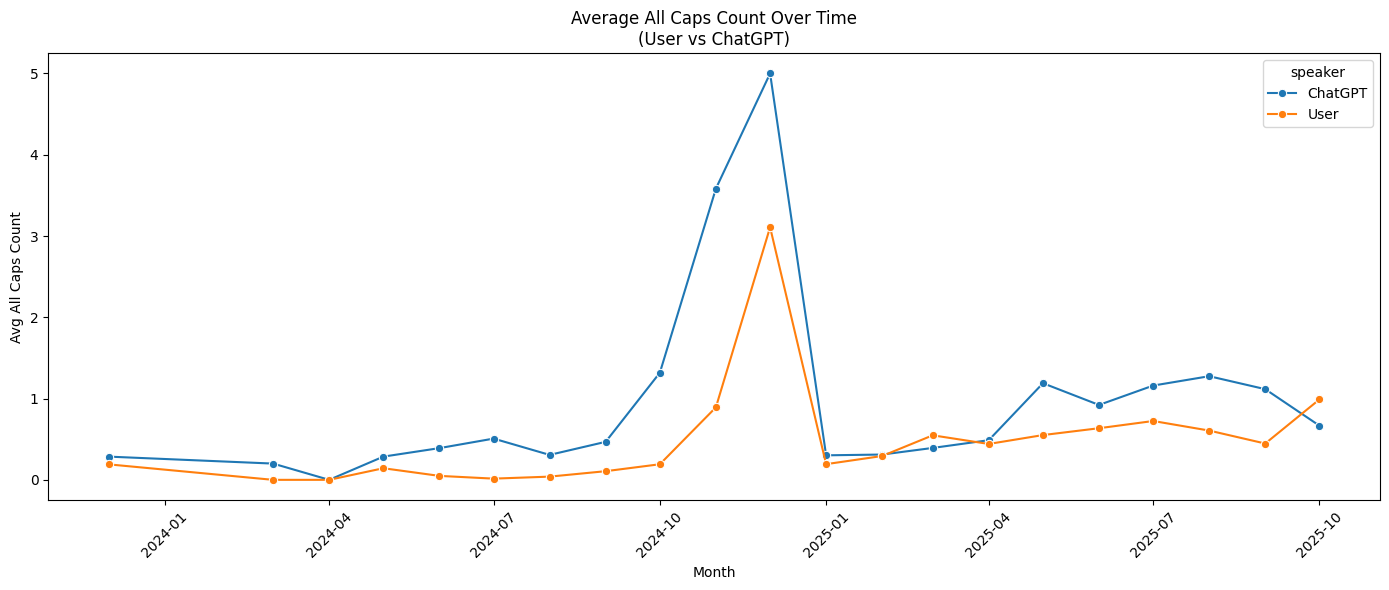

In [51]:
feature = 'all_caps_count'  # ← swap to exclamation_count, question_count, etc.

monthly_feat = (
    master_df.groupby(['year_month', 'speaker'])[feature]
    .mean()
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_feat,
    x='year_month',
    y=feature,
    hue='speaker',
    marker='o'
)

plt.title(f"Average {feature.replace('_',' ').title()} Over Time\n(User vs ChatGPT)")
plt.xlabel("Month")
plt.ylabel(f"Avg {feature.replace('_',' ').title()}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Temporal Evolution: User Prosody Markers**

The below multi-line plot tracks the evolution of user-side prosodic markers across the full timeline. Despite the interpretive ambiguities inherent in these punctuation features (as discussed, where organizational and expressive functions often overlap), a clear pattern emerges: **beginning in September 2024, user messages become markedly more conversationally expressive**.

Prior to this inflection point, most prosodic markers remain near zero, with question marks showing the only consistent presence. From September onward, virtually all tracked features exhibit increased variability and higher average counts. This temporal shift aligns with the transition from volume-driven to depth-driven engagement observed in earlier visualizations. As conversations lengthened and became more continuous (beginning in late 2024), user messages appear to have become correspondingly more prosodically varied. 

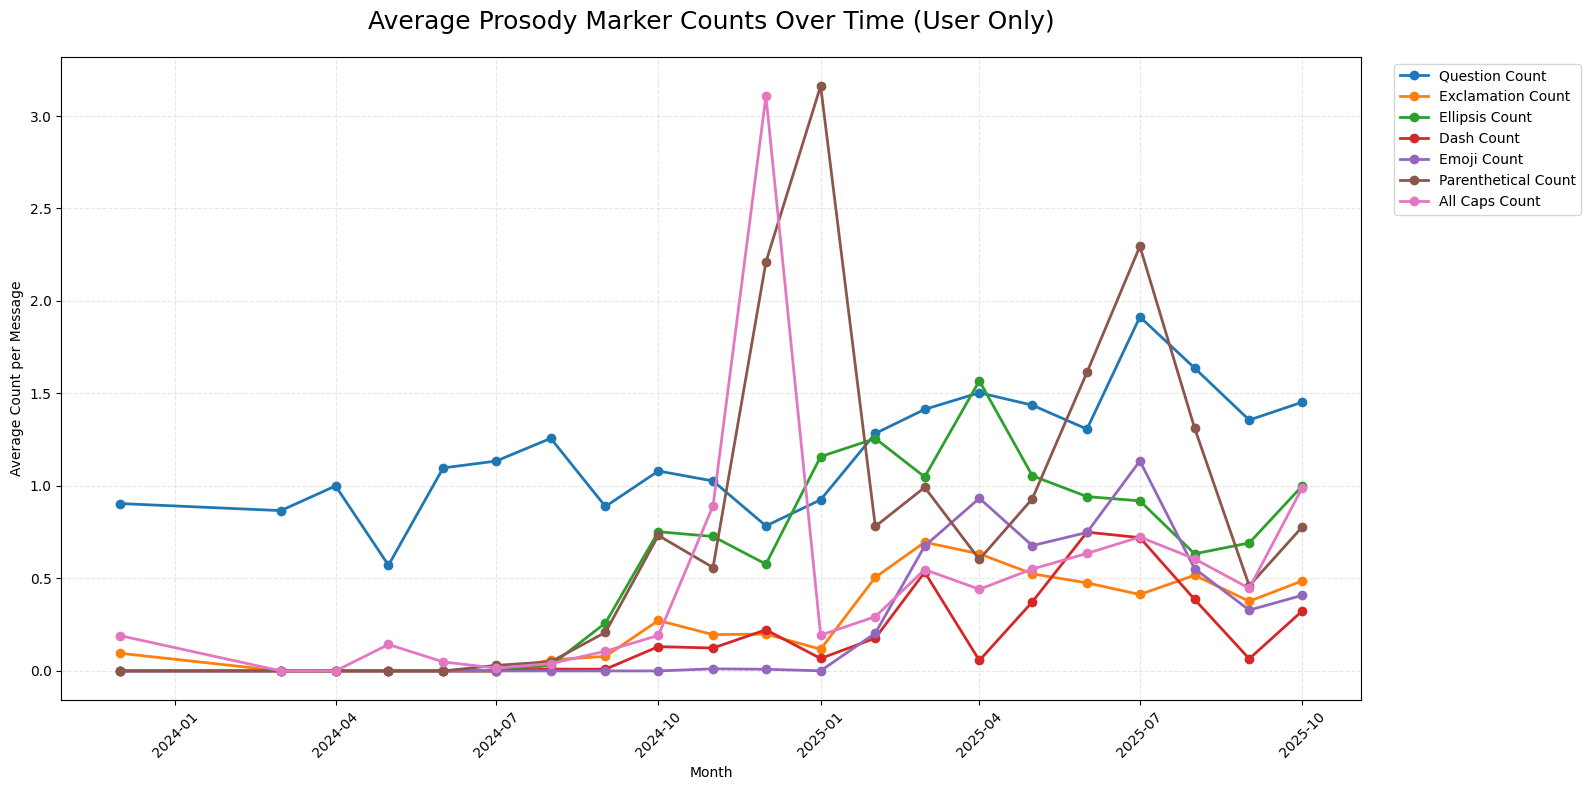

In [57]:
# Prosody feature columns
prosody_cols = [
    'question_count',
    'exclamation_count',
    'ellipsis_count',
    'dash_count',
    'emoji_count',
    'parenthetical_count',
    'all_caps_count'
]

# Ensure 'year_month' is datetime
if str(master_df['year_month'].dtype).startswith('period'):
    master_df['year_month'] = master_df['year_month'].dt.to_timestamp()

# Filter only USER messages
user_df = master_df[master_df['speaker'] == 'User']  # <-- make sure the casing matches

# Group by month and calculate mean per message
monthly_prosody = (
    user_df.groupby('year_month')[prosody_cols]
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(16, 8))
for col in prosody_cols:
    plt.plot(
        monthly_prosody['year_month'],
        monthly_prosody[col],
        marker='o',
        linewidth=2,
        label=col.replace('_', ' ').title()
    )

plt.title("Average Prosody Marker Counts Over Time (User Only)", fontsize=18, pad=20)
plt.xlabel("Month")
plt.ylabel("Average Count per Message")
plt.xticks(rotation=45)
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))  # move legend outside
plt.tight_layout()
plt.show()


---
# Step 5. Addressing Conversations Outside of OpenAI Account

> In April, I started working with ChatGPT almost exclusively without logging in. At the time, it seemed that having memory on was introducing **more latency and tangents**—a major hindrance while a particular data analysis project was evolving fast.
> Note: While the number of conversations dropped in April (from within my account), the number of messages grew dramatically.
>
> Python cannot extract text from .pages files directly. I manually exported each document as .rtf (to preserve conversational dynamic markers: italics, bold type, etc.), then used Pandoc (via Python subprocess) to convert .rtf → .md for parsing.

The following code was run from a separate notebook for this process: 

```
#import os
#from datetime import datetime

# Get folder path
folder = '/Users/amyzhang/Downloads/ChatGPT_2025_OutsideAccount'

# Get all files with metadata
all_files = os.listdir(folder)
pages_files = [f for f in all_files if f.endswith('.pages')]

file_info = []
for filename in pages_files:
    filepath = os.path.join(folder, filename)
    stats = os.stat(filepath)
    created = datetime.fromtimestamp(stats.st_birthtime)
    
    file_info.append({
        'old_path': filepath,
        'old_name': filename,
        'created': created
    })

# Sort by creation time
file_info.sort(key=lambda x: x['created'])

# Rename with sequential numbering
print("="*70)
print("RENAMING FILES:")
print("="*70)

for i, info in enumerate(file_info, 1):
    date_str = info['created'].strftime('%Y%m%d')
    
    # Keep original name but prefix with number
    old_name = info['old_name']
    new_name = f"{i:03d}_{date_str}_{old_name}"
    new_path = os.path.join(folder, new_name)
    
    # Rename the file
    os.rename(info['old_path'], new_path)
    
    print(f"{i:3d}. {old_name:50s} → {new_name}")

print(f"\n✅ Renamed {len(file_info)} files chronologically!")
```

### Parsing and Saving

```
def parse_rtf_markdown_conversation(file_path):
    """Parser for RTF-converted markdown files"""
    
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        content = f.read()
    
    # Clean up escaped backslashes from RTF conversion
    content = content.replace('\\', '')
    
    # Get filename metadata
    import os
    from datetime import datetime
    
    filename = os.path.basename(file_path)
    parts = filename.replace('.md', '').split('_')
    desc_name = parts[-1] if len(parts) > 3 else filename.replace('.md', '')
    conversation_id = f"{parts[0]}o_{desc_name}"
    
    stats = os.stat(file_path)
    created_dt = datetime.fromtimestamp(stats.st_birthtime)
    created_date = created_dt.strftime('%m/%d/%Y %H:%M:%S')
    updated_date = created_date
    
    # Split on the markers
    turns = re.split(r'\*\*(You said:|ChatGPT said:)\*\*', content)
    
    messages = []
    turn_number = 0
    
    for i in range(1, len(turns), 2):
        if i+1 < len(turns):
            marker = turns[i].strip()
            message = turns[i+1].strip()
            
            if not message:
                continue
            
            turn_number += 1
            speaker = "User" if "You said" in marker else "ChatGPT"
            
            # All metrics
            word_count = len(message.split())
            char_count = len(message)
            question_count = message.count('?')
            exclamation_count = message.count('!')
            has_code = bool(re.search(r'```', message))
            bold_count = len(re.findall(r'\*\*[^*]+\*\*', message))
            italic_count = len(re.findall(r'(?<!\*)\*(?!\*)([^*]+)\*(?!\*)', message))
            # In the parser, replace emoji_count calculation with:
            emoji_count = len(re.findall(
            r'[\U0001F300-\U0001F9FF]|[\U0001F600-\U0001F64F]|'
            r'[\U0001F680-\U0001F6FF]|[\U00002600-\U000027BF]', 
            message
            ))
            emoji_count += message.count('��')  # Add placeholder emoji count
            ellipsis_count = message.count('...')
            dash_count = message.count('---')
            parenthetical_count = message.count('(')
            
            words = message.split()
            all_caps_count = len([w for w in words if len(w) >= 3 and w.isupper() and w.isalpha()])
            
            text_cleaned = message.replace('* * *', '')
            text_cleaned = re.sub(r'\b\w+\.(txt|csv|json|py|ipynb|md|png|jpg|gif|pdf)\b', '', text_cleaned)
            text_cleaned = re.sub(r'\d+\\.', '', text_cleaned)
            sentences = [s.strip() for s in text_cleaned.split('.') if s.strip()]
            sentence_count = len(sentences)
            avg_sentence_length = word_count / max(sentence_count, 1)
            
            messages.append({
                'conversation_id': conversation_id,
                'created_date': created_date,
                'updated_date': updated_date,
                'conversation_lifespan_days': 0,
                'turn_number': turn_number,
                'speaker': speaker,
                'message': message,
                'word_count': word_count,
                'char_count': char_count,
                'question_count': question_count,
                'exclamation_count': exclamation_count,
                'has_code': has_code,
                'bold_count': bold_count,
                'italic_count': italic_count,
                'emoji_count': emoji_count,
                'ellipsis_count': ellipsis_count,
                'dash_count': dash_count,
                'parenthetical_count': parenthetical_count,
                'all_caps_count': all_caps_count,
                'sentence_count': sentence_count,
                'avg_sentence_length': avg_sentence_length
            })
    
    df = pd.DataFrame(messages)
    df['conversation_turn_total'] = len(df)
    
    # Text overlap
    overlap_percentages = []
    for idx in df.index:
        if idx == 0:
            overlap_percentages.append(0.0)
        else:
            current = df.loc[idx, 'message']
            previous = df.loc[idx-1, 'message']
            current_words = set(current.lower().split())
            previous_words = set(previous.lower().split())
            if len(current_words) == 0:
                overlap_percentages.append(0.0)
            else:
                overlap = current_words.intersection(previous_words)
                overlap_percentages.append((len(overlap) / len(current_words)) * 100)
    
    df['text_overlap_pct'] = overlap_percentages
    
    return df

# Parse the correct file
test_md = '/Users/amyzhang/Downloads/Chat_outside/001_20250416_1_20250416_youdontknowme.md'
df_test = parse_rtf_markdown_conversation(test_md)
df_test.to_csv('/Users/amyzhang/Downloads/youdontknowme_parsed.csv', index=False)

print("✅ Parsed and saved!")
print(f"Shape: {df_test.shape}")
print(f"Turns: {len(df_test)}")
```

# Next Steps & Reflections

This notebook demonstrates the first stage of a privacy-preserving relational health monitoring system for human-AI interaction. We transformed conversation exports into structured, feature-rich data, attempting to capture the **prosodic and affective texture** of conversational dynamics without requiring deep semantic analysis (yet). 

## Key Findings

**Meta-textual markers as weak but promising signals:** Question marks, exclamations, emojis, and other typographic features proved insufficient as standalone indicators of relational dynamics. Their sparsity, context-dependence, and dual function (organizational vs. expressive) limit their interpretive power when measured as raw counts.

However, these features show promise as **privacy-preserving proxy metrics** when transformed into:
- **Ratios** (emojis per message, questions per turn)
- **Rates of change** (how does punctuation density evolve within/across conversations?)
- **Distributional patterns** (via PCA and other unsupervised methods)

Critically, these approaches avoid the privacy risks inherent in semantic analysis via sentence transformers or LLMs, deferring such methods until absolutely necessary.

**Engagement mode transitions:** The analysis revealed distinct phases in user engagement—from **volume-driven intensity** (many short conversations) to **depth-driven intensity** (fewer but longer, more continuous conversations). This transition, beginning around September 2024, coincided with increased prosodic expressiveness, suggesting that relational depth manifests both in conversation length and linguistic variety.

**Model effects matter:** Temporal patterns in ChatGPT's behavior cannot be attributed solely to user influence. Model architecture and training objectives (e.g., GPT-4o's emphasis on warmth) shape the conversational feedback loop, creating potential confounds in longitudinal analysis.

---

## The Bateson Connection: Meta-Communication & Learning Levels

Gregory Bateson's work on communication, learning, and logical types offers a crucial theoretical framework for understanding what's at stake in human-AI relationships. This project is particularly inspired by his insights into the non-verbal meta-signals that distinguish "this is play" from "this is real fighting", as well as his analysis of how coping with double binds can lead to either pathology or creativity.

**The Meta-Communication Problem:**

Bateson observed how animals (like dogs play-fighting) use **meta-signals** to communicate *about* their communication—"this is play, not real fighting." These meta-signals prevent pathological confusion by making the frame of interaction explicit.

In human-AI interaction, meta-signals are equally crucial--especially given how slippery it can be to identify points of "learning" in the interaction with an LLM, who does not technically "learn" (Bateson - Learning Type I or II) within a conversation, but is capable of nuanced adaptation, change, and context-inferring (How Bateson would have approached transformer 'attention' is an intriguing question). So in fact, in my own interactions with LLMs, I've noticed my meta-signaling often takes this form:
- "I know you (LLM) are not really learning"
- "You know I know you're not really learning"
- "But we're going to interact AS IF there's relationship/continuity anyway"
- "And that's productive, not pathological"

**Presence of meta-signals → healthy, generative interaction**  
**Absence of meta-signals → potential confusion about the nature of the AI relationship**

The challenge for young people (and many adults) is developing this **meta-communicative competence**—the ability to engage productively with AI while maintaining clarity about the asymmetric, fundamentally different nature of the relationship.

---

## From Feature Engineering to Diversity Metrics

The next phase of this research will implement **Remote Clique (RC) metrics** to assess conversational diversity—a more sophisticated approach to detecting stagnation versus generative exploration:

**Intra-Remote-Clique (Intra-RC):** Measures topical/conceptual diversity *within* a single conversation
- High Intra-RC → wide-ranging exploration, conceptual breadth
- Low Intra-RC → narrow focus, potentially stuck or repetitive patterns

**Inter-Remote-Clique (Inter-RC):** Measures diversity *across* conversations over time
- High Inter-RC → varied contexts and use cases, adaptive learning
- Low Inter-RC → repetitive applications, limited growth or exploration

These metrics, combined with the prosodic and temporal features already extracted, can help identify:
- **Generative patterns:** User is exploring, learning, developing meta-cognitive awareness
- **Stagnant patterns:** User is stuck in repetitive loops, suggesting possible over-reliance or dependency
- **Confusion signals:** Mismatch between user's apparent beliefs about AI capabilities and actual AI affordances

We are indebted to the research of Juhye Ha, Hyeon Jeon, DaEun Han, Jinwook Seo, and Changhoon Oh on [CloChat](https://arxiv.org/abs/2402.15265), whose work on diversity metrics in conversational AI inspired this approach.

---

## Why This Matters

As LLMs become ubiquitous learning partners for young people, we need tools that respect privacy while still enabling **safe oversight and developmental reflection**. The aim is not surveillance but rather the creation of **mirrors**—systems that help users (and their caregivers or educators) understand their own patterns of engagement without exposing intimate conversational content.

The goal is to support young people in developing the meta-communicative competence to **play productively** with AI—engaging its capabilities, even developing rapport and relational continuity, while understanding its fundamental differences from human relationships. Not treating AI as merely a tool to be exploited, nor as a person to be fully trusted, but meeting it as what it is: a strange new interlocutor that demands new forms of literacy.

---

**Code, data, and analysis:** Amy Zhang, Claude AI, ChatGPT, Perplexity AI
